<a href="https://colab.research.google.com/github/ezrafield/ibm-certificate-final/blob/main/find_matrix_rotate_by_SIFT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 

In [ ]:
# !pip uninstall opencv-python
# !pip uninstall opencv-contrib-python

In [ ]:
# !pip install opencv-contrib-python
# !pip install opencv-python

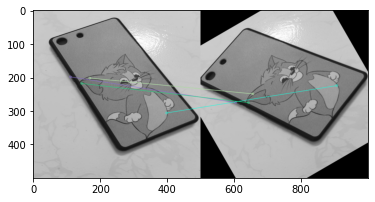

(<matplotlib.image.AxesImage at 0x7f963a99ca50>, None)

In [ ]:
import urllib
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from PIL import Image # thay cho cv2.imread bị lỗi
%matplotlib inline

SIZE = (500, 500)

# req1 = urllib.request.urlopen('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ2mq74d-4LnBxYm0Sk1P1w5Ivz7BXCiuW9mXrVYHXhEAPWWnlbUwB-f4N9YQd1gW2jRuY&usqp=CAU')
# arr1 = np.asarray(bytearray(req1.read()), dtype=np.uint8)
# img1 = cv2.imdecode(arr1, -1)
img1 = cv2.imread('/content/testimg.jpg', 0)

img1 = cv2.resize(img1, SIZE, interpolation = cv2.INTER_AREA)


# img2 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)
# req2 = urllib.request.urlopen('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYNhmOMUmdDaQcEztsqudiyCMLQHMQBp8td_p1tOGtjpSeLBhYwlMwkuUOPiZoPU2e834&usqp=CAU')
# arr2 = np.asarray(bytearray(req2.read()), dtype=np.uint8)
# img2 = cv2.imdecode(arr2, -1)
height, width = SIZE[:2]
center = (width/2, height/2)
MatrixRotate = cv2.getRotationMatrix2D(center= center, angle=30, scale=1)
img2 = cv2.warpAffine(img1, MatrixRotate, SIZE)
img2 = cv2.resize(img2, SIZE, interpolation = cv2.INTER_AREA)

# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
# sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:5], img2, flags=2)
plt.imshow(img3),plt.show()

In [ ]:
# Initialize lists
list_kp1 = []
list_kp2 = []

# For each match...
for mat in matches:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1, y1) = keypoints_1[img1_idx].pt
    (x2, y2) = keypoints_2[img2_idx].pt

    # Append to each list

    if (x1, y1) in list_kp1:
      continue
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

In [ ]:
list_sorted_matches_pt = [[list_kp1[i], list_kp2[i]] for i in range(len(list_kp1))]
len(list_sorted_matches_pt)

195

## check list keypoint


In [ ]:
list_kp1

In [ ]:
list_kp2

## check model work

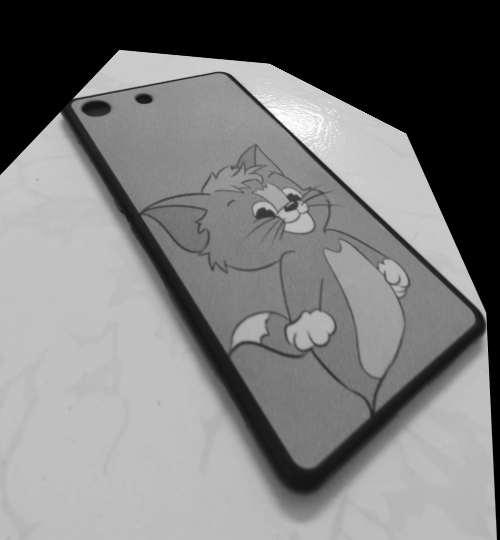

In [ ]:
from numpy import zeros, newaxis
import random
img2v = img2.copy()

width,height = 500,540
# list_kp1v = [np.append(np.asarray(i), [1]) for i in list_kp1]
# list_kp2v = [np.append(np.asarray(i), [1]) for i in list_kp2]

# indexs = list(map(int,random.sample(range(len(list_kp1)), 4)))
# pts1 = np.float32([list_kp1[i] for i in indexs])
# pts2 = np.float32([list_kp2[i] for i in indexs])
pts1 = np.float32(list_kp1[:4])
pts2 = np.float32(list_kp2[:4])

matrix = cv2.getPerspectiveTransform(pts2, pts1)
imgOutput = cv2.warpPerspective(img2v,matrix,(width,height), flags=cv2.INTER_LINEAR)

from google.colab.patches import cv2_imshow
cv2_imshow(imgOutput)

In [ ]:
matrix


array([[ 5.48796604e-01, -5.15397177e-01,  1.59259964e+02],
       [ 2.95022144e-01,  3.45449567e-01,  7.23043149e+00],
       [-1.91109504e-04, -1.12870257e-03,  1.00000000e+00]])

In [ ]:
MatrixRotate

array([[  0.8660254 ,   0.5       , -91.50635095],
       [ -0.5       ,   0.8660254 , 158.49364905]])

In [ ]:
Hmatrix, _ = cv2.findHomography(pts2, pts1)
Hmatrix

array([[ 5.48796807e-01, -5.15397280e-01,  1.59260009e+02],
       [ 2.95022268e-01,  3.45450054e-01,  7.23035106e+00],
       [-1.91109573e-04, -1.12870133e-03,  1.00000000e+00]])

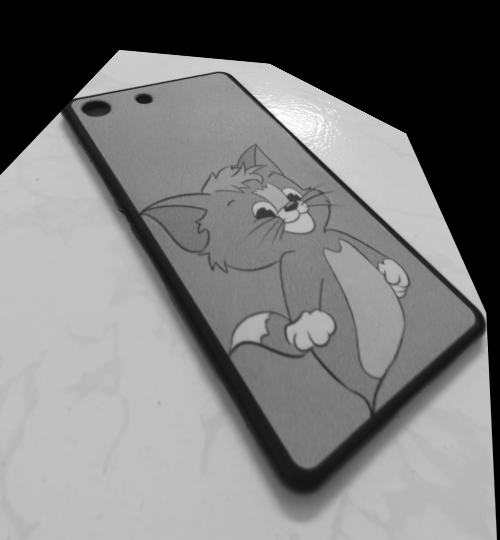

In [ ]:
imgOutput = cv2.warpPerspective(img2v,Hmatrix,(width,height), flags=cv2.INTER_LINEAR)

from google.colab.patches import cv2_imshow
cv2_imshow(imgOutput)

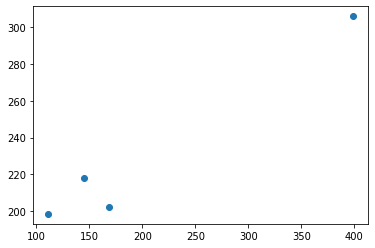

In [ ]:

plt.scatter(*zip(*pts1[:4]))

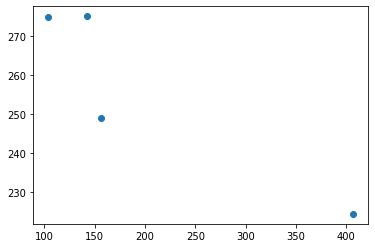

In [ ]:
plt.scatter(*zip(*pts2[:4]))